VAMOS A DETERMINAR LA CONJUNTO DE MEJORES VARIABLES PARA EL PESO DE UN PINGUINO

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

CARGAMOS DATASET

In [14]:
penguins_df = sns.load_dataset('penguins')
penguins_df.dropna(inplace=True)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


CORRELACIONES ENTRE LAS VARIABLES

<Axes: >

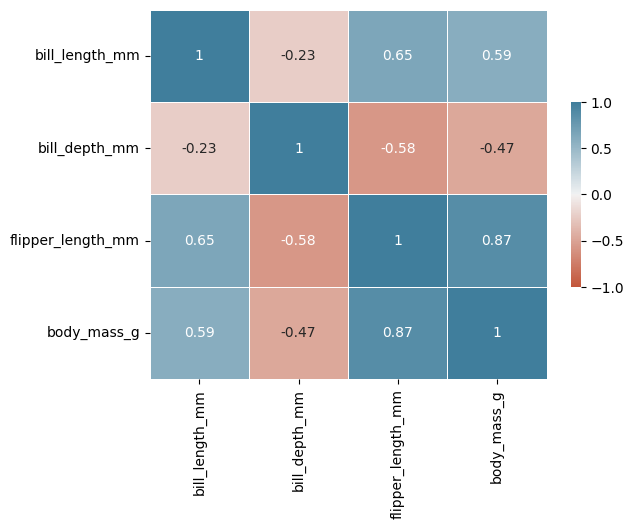

In [ ]:
sns.heatmap(
    data=penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

CREAMOS MODELO DE REGRESIÓN LINEAL SIMPLE ENTRE EL PESO DEL PIGUINO Y LA LONGITUD DE LA ALETA
Y = BODY_MASS_G
X = BILL_LENGTH_MM

In [15]:
model_1 = (
    smf.ols(
        formula = "body_mass_g ~ bill_length_mm",
        data=penguins_df
    )
    .fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.54e-32
Time:                        02:07:25   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CREAMOS OTRO MODELO PARA RELACIONAR EL PESO DEL PINGUINO CON EL BILL_LENGTH_MM + BILL_DEPTH_MM
Y = BODY_MASS_G
X = BILL_LENGTH_MM + BILL_DEPTH_MM

In [16]:
model_2 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm",
        data=penguins_df
    )
    .fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           7.04e-46
Time:                        02:07:29   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CREAMOS OTRO MODELO Y AGREGAMOS LA VARIABLE DE LA LONGITUD DE ALETA DEL PINGUINO FLIPPER_LENGTH_MM

In [17]:
model_3 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",
        data=penguins_df
    )
    .fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          9.26e-103
Time:                        02:07:33   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

AGREGAMOS UNA VARIABLE CATEGORIA (SEXO DEL PINGUINO)

In [18]:
model_4 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
        data=penguins_df
    )
    .fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          6.28e-122
Time:                        02:07:37   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.Male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ANALIZAMOS EL MODELO CON LA MEJOR CORRELACIÓN
Y = BODY_MASS_G
X = flipper_length_mm

In [19]:
model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm",
        data=penguins_df
    )
    .fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          3.13e-105
Time:                        02:07:39   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MOSTRANDO GRAFICO DE LOS MODELOS CREADOS

REALIZAMOS PREDICCIONAR POR CADA MODELO

In [22]:
model_1_prediccion = model_1.predict(penguins_df)
model_2_prediccion = model_2.predict(penguins_df)
model_3_prediccion = model_3.predict(penguins_df)
model_4_prediccion = model_4.predict(penguins_df)
model_5_prediccion = model_5.predict(penguins_df)

model_1_prediccion

,0
0,3782.402961
1,3817.119665
2,3886.553073
4,3574.102738
5,3799.761313
...,...
338,4485.416214
340,4450.699510
341,4763.149845
342,4311.832695


In [23]:
dic_predicciones = {
    "actual_value":penguins_df.body_mass_g,
    "model_1_prediccion": model_1_prediccion,
    "model_2_prediccion": model_2_prediccion,
    "model_3_prediccion": model_3_prediccion,
    "model_4_prediccion": model_4_prediccion,
    "model_5_prediccion": model_5_prediccion
}

models_result = pd.DataFrame(dic_predicciones)
models_result

,actual_value,model_1_prediccion,model_2_prediccion,model_3_prediccion,model_4_prediccion,model_5_prediccion
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3205.648453
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3456.414782
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3907.794176
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3807.487644
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3657.027846
...,...,...,...,...,...,...
338,4925.0,4485.416214,4951.159375,4817.401804,4730.939522,4860.706229
340,4850.0,4450.699510,4833.930015,4877.548625,4719.043886,4910.859495
341,5750.0,4763.149845,4899.545411,5269.708799,5402.946434,5261.932356
342,5200.0,4311.832695,4641.476223,4728.911846,4563.248182,4760.399697


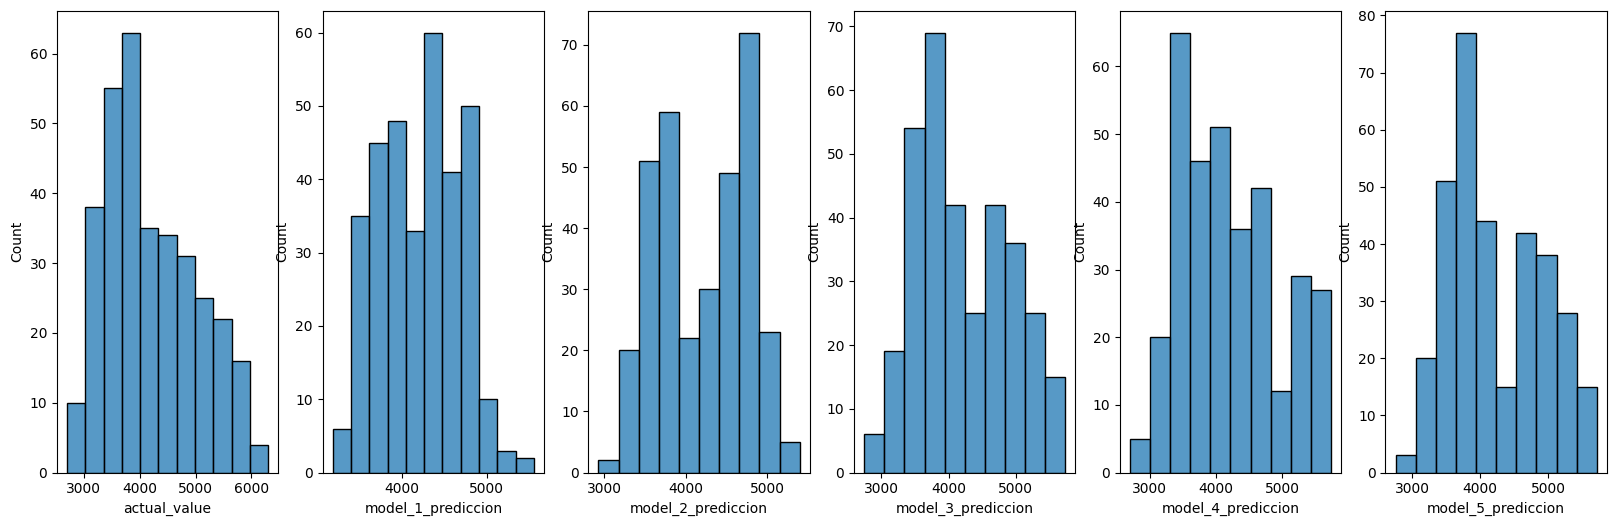

In [24]:
fig, ax = plt.subplots(1, 6, figsize=(20, 6))

for i, model in enumerate(models_result.columns[0:6]):
    sns.histplot(
        data=models_result,
        x=model,
        # hue='species',
        ax=ax[i],
    )

In [25]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

ECDFf

<Axes: ylabel='Proportion'>

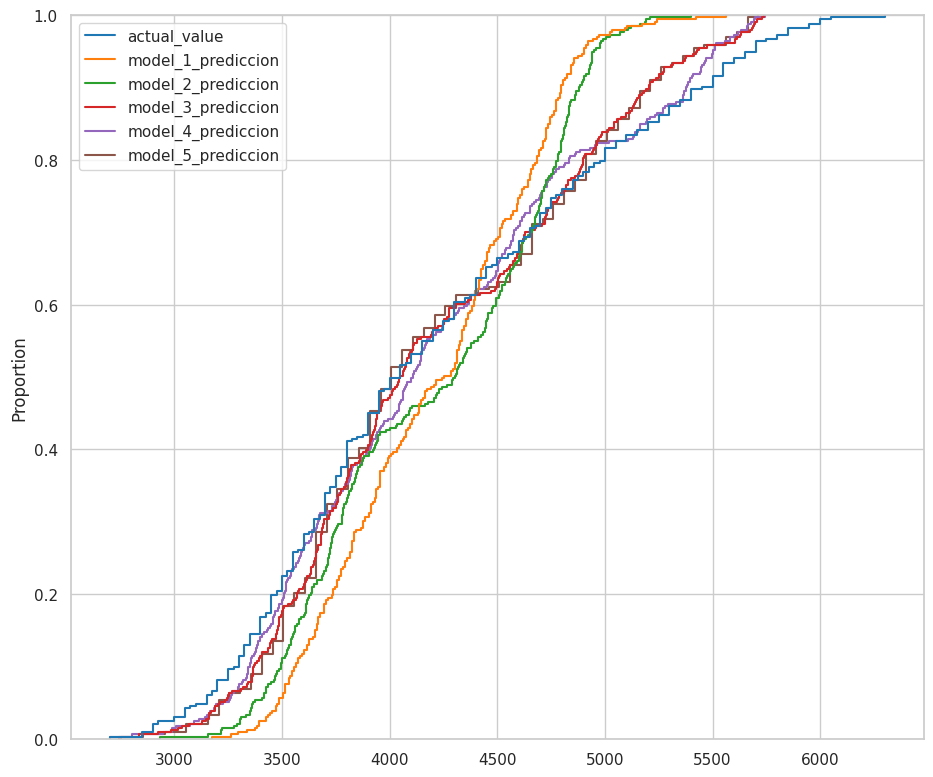

In [26]:
sns.ecdfplot(
  data=models_result
)

<Axes: ylabel='Proportion'>

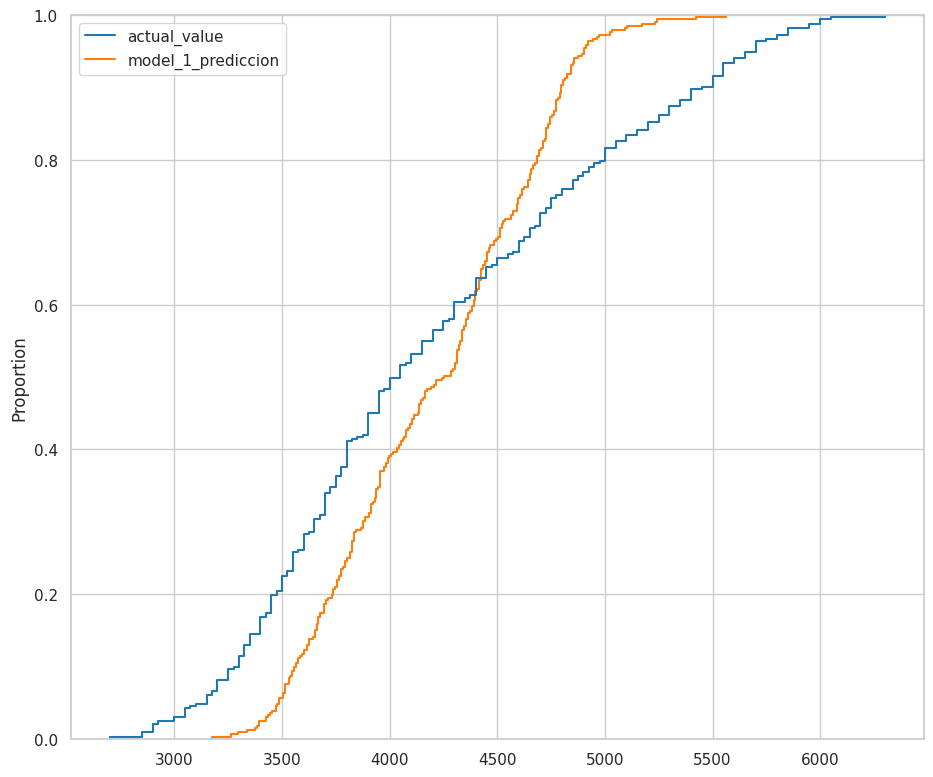

In [27]:
df_model_1_prediccion = models_result[['actual_value','model_1_prediccion']]
sns.ecdfplot(data=df_model_1_prediccion)